In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class GradianDescent:
    def __init__(self, f, df, alpha=0.01, eps=1e-6):
        self.f = f
        self.df = df
        self.alpha = alpha
        self.eps = eps
        self.path = None
        
    def solve(self, init):
        x = init
        path = []
        grad = self.df(x)
        path.append(x)
        while (grad**2).sum() > self.eps**2:
            x = x - self.alpha * grad
            grad = self.df(x)
            path.append(x)
        self.path_=np.array(path)
        self.x_ = x 
        self.opt_ =self.f(x)

In [10]:
def f(xx):
    x = xx[0]
    y = xx[1]
    return 5*x**2 - 6*x*y + 3*y**2 + 6*x - 6*y 

def df(xx):
    x = xx[0]
    y = xx[1]
    return np.array([10*x - 6*y +6, -6*x +6*y - 6])

In [10]:
algo = GradianDescent(f, df)
initial = np.array([1, 1])
algo.solve(initial)

In [11]:
print(algo.x_)

[3.45722846e-07 1.00000048e+00]


In [12]:
print(algo.opt_)

-2.9999999999997073


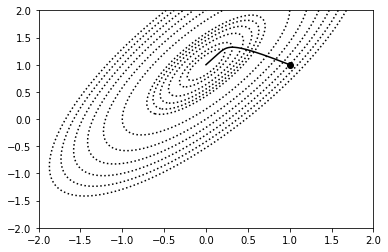

In [16]:
plt.scatter(initial[0], initial[1], color="k", marker="o")
plt.plot(algo.path_[:, 0], algo.path_[:, 1], color="k", linewidth=1.5)
xs = np.linspace(-2, 2, 300)
ys = np.linspace(-2, 2, 300)
xmesh, ymesh = np.meshgrid(xs, ys)
xx = np.r_[xmesh.reshape(1, -1), ymesh.reshape(1, -1)]
levels = [-3, -2.9, -2.8, -2.6, -2.4, 
          -2.2, -2, -1, 0, 1, 2, 3, 4]
plt.contour(xs, ys, f(xx).reshape(xmesh.shape), 
            levels=levels,
            colors="k", linestyles="dotted")
plt.show()

In [3]:
#part2

In [6]:
xmin, xmax, ymin, ymax = -3, 3, -3, 3

In [22]:
algos = []
initial = np.array([1,1])
alphas = [0.1, 0.2]
for alpha in alphas:
    algo = GradianDescent(f, df, alpha)
    algo.solve(np.array(initial))
    algos.append(algo)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in square
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in subtract
  from ipykernel import kernelapp as app


In [23]:
xs = np.linspace(xmin, xmax, 300)
ys = np.linspace(ymin, ymax, 300)

In [24]:
xmesh, ymesh = np.meshgrid(xs, ys)
xx = np.r_[xmesh.reshape(1, -1), ymesh.reshape(1, -1)]
levels = [-3, -2.9, -2.8, -2.6, -2.4, -2.2, -2, -1, 0, 1, 2, 3, 4]

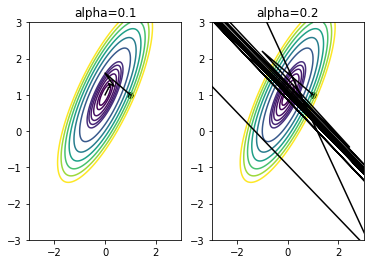

In [28]:
fig, ax = plt.subplots(1, 2)
for i in range(2):
    ax[i].set_xlim((xmin, xmax))
    ax[i].set_ylim((ymin, ymax))
    ax[i].set_title("alpha={}".format(alphas[i]))
    ax[i].scatter(initial[i], initial[1], color="k", marker="o")
    ax[i].plot(algos[i].path_[:, 0], algos[i].path_[:, 1], color="k", linewidth=1.5)
    ax[i].contour(xs, ys, f(xx).reshape(xmesh.shape), levels=levels)